### MIE370 Project 1 --- Classification and Ensemble models
**Deadline: Sep 27th, 9PM [The deadline is firm and will be enforced strictly. Plan ahead and submit hours before the deadline to avoid the risk of lateness penalty.]**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the MIE370 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on projects or assessments will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:

Full Name: Devraj Solanki  

Student ID: 1009065707

UTorID: Solank58

**Three submission files are required:**

For submitting this project, three files must be submitted on Quercus by the project deadline:

1) The complete Jupyter file containing all code and comments with outputs (in .ipynb format) (that completely compiles on Google colab without any errors regardless of the computer used.)

2) A self-contained and complete HTML printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

3) Appendix pdf file of all prompts and all responses for all interactions you have had regarding this project with any AI assistant tool (Chat GPT etc.). If you do not use any AI assistant tool at all, this appendix pdf file is not needed.

**Policy regarding the use of AI assistant tools**

If you use a generative AI tool (e.g., ChatGPT, GitHub Copilot, or any other similar tool) to get ideas and/or partial answers for projects or assignments or to generate any code and/or text, you must declare in your submission the tools that you have used and describe the usage, and include in your submission an appendix that captures all the interactions (prompts and responses).

You will not be penalized for the declared use of such AI assistant tools, and the grading decisions will be based on your original contributions as well as the efforts that you make to check and/or correct the answers provided by the tool. Students are ultimately accountable for the work they submit. Failure to fully declare the use of this tool will be considered "unauthorized assistance" and will have consequences (See B.I. of the [U of T CODE OF BEHAVIOUR ON ACADEMIC MATTERS](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019))

##**Marking Scheme:**

This project is worth **8 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to obtain an **HTML** file from an **IPYNB** file

1. Download the IPYNB file of your complete project: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of a new Colab session

3. Select & upload your `.ipynb` file you just downloaded, and then copy its path (right click) (you might need to hit the Refresh button before your file shows up)


4. Replace XXXX with the copied path and then execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html XXXX
```

5. An HTML version of your notebook will appear in the Colab session files and you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus (before the deadline) for grading.



More info on coverting IPYNB to HTML: https://stackoverflow.com/a/64487858



# **I declare, I have used ChatGPT v4 for assistance while working on this project.**

### Additionally, I have used documentation provided for this lab, as well as online resources such as Stack Overflow for information and referencing to code this lab

# Project 1 **[100 Marks]**
You are going to apply several ML methods for a predictive task on a new dataset.

We're going to work with the [fake bill dataset](https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills). The dataset examine whether the bill is fraudulent based on its dimensions.  


Download it using the cells below:

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=be6531e06fdccacd6c0b21222c2e1cf8e2b6ec867f7693b67ccf1775f61972a8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Part 0: Getting started **[5 Marks]**
First off, load the dataset in CSV file as a Pandas DataFrame and name it `df`. Print out the first few rows of the dataset, and take a look at the features data and the target columns.

* Identify the target column (the variable we aim to predict)? is_genuine **[1]**
* How many features do we have in this dataset in order to predict the target? 6 **[1]**

Now add an additional column containing either 1 (if the target column is True) or 0 (if the target column is False). This will be the new target value to classify the data **[3]**

In [ ]:
myfile = wget.download('https://raw.githubusercontent.com/chf-NewStart/MIE370-TA-Material/main/modified_fake_bills_csv.csv')
df = pd.read_csv(myfile, delimiter=',')

In [ ]:
### YOUR CODE HERE ###
df.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,515.43,104.86,104.95,4.52,2.89,112.83
1,True,514.38,103.36,103.66,3.77,2.99,113.09
2,True,518.07,104.48,103.50,4.40,2.94,113.16
3,True,514.08,103.91,103.94,3.62,3.01,113.51
4,True,515.19,104.28,103.46,4.04,3.48,112.54


In [ ]:
truth = df['is_genuine'].apply(lambda x: int(x))
df.insert(7,'Target',truth)
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Target
0,True,515.43,104.86,104.95,4.52,2.89,112.83,1
1,True,514.38,103.36,103.66,3.77,2.99,113.09,1
2,True,518.07,104.48,103.50,4.40,2.94,113.16,1
3,True,514.08,103.91,103.94,3.62,3.01,113.51,1
4,True,515.19,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,False,515.25,104.38,104.17,4.42,3.09,111.28,0
1496,False,516.57,104.63,104.44,5.27,3.37,110.97,0
1497,False,515.40,104.01,104.12,5.51,3.36,111.95,0
1498,False,516.18,104.28,104.06,5.17,3.46,112.25,0


# Part A: Pre-processing **[16 Marks Total]**

## Part A1: Data Cleaning **[6 marks]**

Each row in this dataset represents the physical measurements of a single banknote (paper money).

The columns include various dimensions of the banknote, such as its diagonal, left height, right height, lower margin, upper margin, and total length. The 'is_genuine' column indicates whether the banknote is genuine or counterfeit.


Check for missing values **[2]**. If any missing values are found, delete the entire row **[2]**

Report the size of the dataset after this operation (how many rows and how many columns after the cleaning) **[2]**

Some useful hints:


*   [THIS](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) returns a boolean same-sized object indicating if the values are NA.
*   [THIS](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) removes missing values.





In [ ]:
### YOUR CODE HERE ###

df.dropna(axis = 0, how = 'any',inplace = True)

print("The number of rows: " + str(df.shape[0]) + " \nThe number of columns: " +
                                   str(df.shape[1]))

The number of rows: 1463 
The number of columns: 8


## Part A2: Final Clean Up Before Splitting **[3 Marks]**


Since our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) Therefore, it is best practice to have a training set (from which there is a rotating validation subset) and a test set.

**BUT BEFORE SPLITTING (you will perform splitting the dataset in Part A3), Let's do some final clean ups in this part:**

See the example given [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

* The first argument in train_test_split
is the **X value** (the quanities we use
in order to predict)
* The second argument is the **y value** (the quantity we want to predict)

We need to only keep the feature columns for the X value. Given that, prepare the variables X and y. **[3]**

Check [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) example to see how to drop columns

*hint: use axis = 1 to drop columns, otherwise it's defaulted to axis = 0 which is used to drop rows*


In [ ]:
### YOUR CODE HERE ###
X = df.drop(['is_genuine', 'Target'], axis = 1)
y = df['Target']

## Part A3: Data Splitting **[3 Marks]**

Now that we have the X and y values, we can split the dataset into training and testing.

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=21``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[3]**

**Only Split the dataset once within your notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [ ]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3,
                                                    train_size = 0.7,
                                                    random_state = 21)

## Part A4: Effect of Standardization (Visual) **[4 Marks]**

Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the `height_left`, and the y-axis is the `diagonal`, and the color of each datapoint indicates its class.  **[2]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? You can visualize feature distributions before and after standardization **[2]**




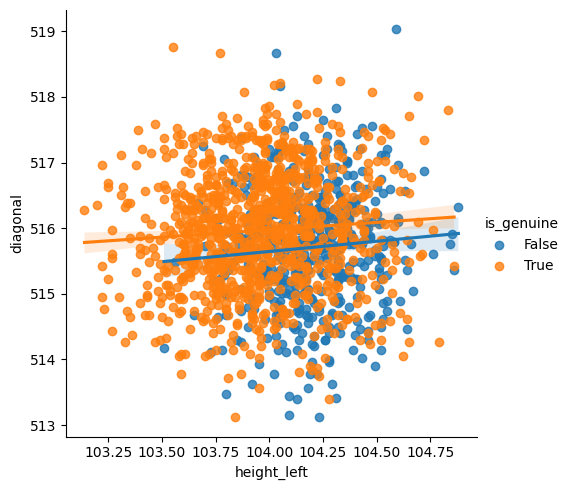

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns
sns.lmplot(data =df, x = 'height_left', y = 'diagonal', hue = 'is_genuine')

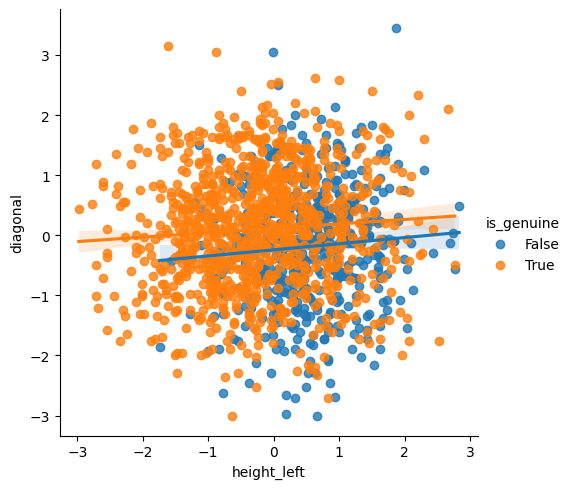

In [ ]:
# Normalizing vars
df_norm = df.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

def norm(df,col):
  scaler.fit(df_norm[col].to_numpy().reshape(-1,1))
  df_norm[col] = scaler.transform(df_norm[col].to_numpy().reshape(-1,1))

norm(df_norm, 'height_left')
norm(df_norm, 'diagonal')

sns.lmplot(data =df_norm, x = 'height_left', y = 'diagonal',
           hue = 'is_genuine')

**ANSWER:** The scale of the plot has changed since the features have now been normalized. However, overall the datapoints are distributed exactly the same. This is because standardization only changes the scale of the data being used and not the relative distance between datapoints on that scale (so that we can preserve the original distribution of the data). The advantage of standardization is that it allows for all features in a dataset to have the same scale. This allows us to use sensitive machine learning models on these features without worrying about if the scale of the data we use will bias the model results.

# Part B: KNN **[32 Marks Total]**

## Part B1: KNN Model with Standardization **[12 Marks]**

Let's create a KNN Model to predict whether a bill is fake by its dimensions!


Follow these steps:

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[2]**

2. Train a KNN Model using 5-fold cross-validation on the dataset. Sweep `k` (number of neighbors) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[4]**
3.   What is the best `k`? What is the highest cross-validation accuracy? **[4]**
4. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves.). **[2]**



**Note:** When we standardize a dataset, it matters if the data points are in our training set or test set. The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot use the mean or standard deviation of the whole dataset to standardize it - we can only use the mean and standard deviation of the training set. When the model is ready for testing, we provide our scalers (mean and standard deviation of our training set) to the person who is going to test the model. They can scale their data (test set) with our training set's mean and standard deviation. It is unlikely that the scaled test set would exactly have a mean of zero and a standard deviation of one, but there is no such requirement for the model to perform well.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

In [ ]:
### YOUR CODE HERE ###

# 1.
from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# For writing the following function(s) in Part B involving using Cross Validation to
# calculate accuracy, I have referenced tutorial 3

Text(0.5, 1.0, ' CV accuracy for different values of K')

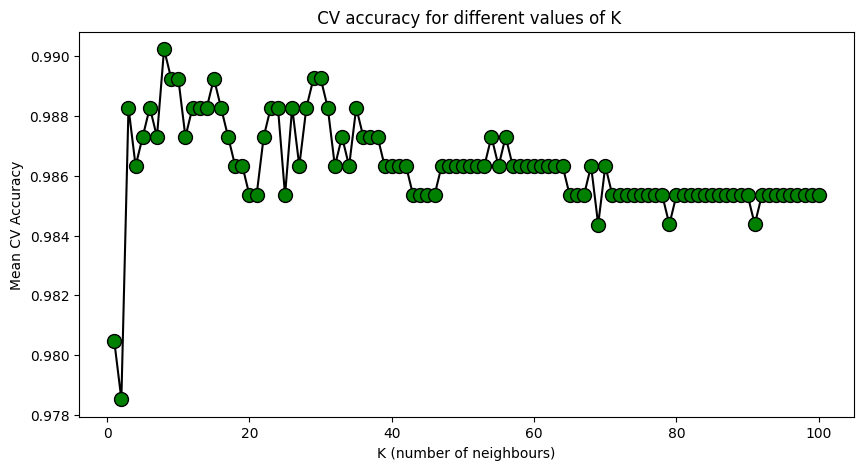

In [ ]:
# 2.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)

cv_val_acc = [] # storing cv acc here to plot later
cv_train_acc = [] # storing cv acc here to plot later

cv = KFold(n_splits=5,
           shuffle=True,
           random_state=0) # 5 fold cv

# using k = 1 to 100
for i in range (1,101):
  knn = KNeighborsClassifier(n_neighbors=i)
  # fit the model and get results
  cv_results = cross_validate(knn,
                            X_train_norm,
                            Y_train,
                            cv=cv, return_train_score = True) #5 fold cv
  cv_val_acc.append(np.mean(cv_results['test_score']))
  cv_train_acc.append(np.mean(cv_results['train_score']))

plt.figure(figsize=(10,5))
plt.plot(range(1,101),cv_val_acc,color='k', marker='o',
         markerfacecolor='g', markersize=10) # plotting val acc
plt.xlabel('K (number of neighbours)')
plt.ylabel('Mean CV Accuracy')
plt.title(" CV accuracy for different values of K")


In [ ]:
# To display graphs (X vs Y) in this project, I have referenced Tutorial 1

In [ ]:
#3
print("The best k seems to be " + str(cv_val_acc.index(max(cv_val_acc)) + 1) +
      " with the highest cv accuracy of " + str(max(cv_val_acc)))


The best k seems to be 8 with the highest cv accuracy of 0.9902391200382592


Text(0.5, 1.0, ' Training/Validation curves for different k values')

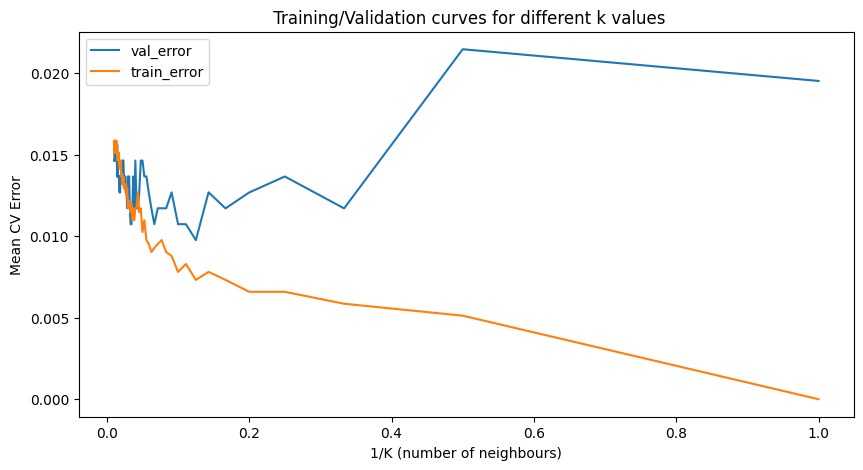

In [ ]:
#4

# calculating error for val and train
cv_val_err = 1 - np.array(cv_val_acc)
cv_train_err = 1 - np.array(cv_train_acc)
k = 1/np.arange(1,101) # plotting 1/k

# creating training and validation curves
plt.figure(figsize=(10,5))
plt.plot(k, cv_val_err, label = 'val_error') # plotting validation error
plt.plot(k, cv_train_err, label = 'train_error') # plotting train error
plt.xlabel('1/K (number of neighbours)')
plt.ylabel('Mean CV Error')
plt.legend()
plt.title(" Training/Validation curves for different k values")


**ANSWER** From the plot above it seems that 1/K values below 0.05 are underfit (since both train and val error are high) and 1/K values after 0.2 are overfit (since train error is low but val error is high). These values would correspond to K > 20 for underfit and K < 5 for overfit.

## Part B2: Feature Selection **[20 Marks Total]**
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature importance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see Step 7 in Part B3.1 below) are not met, we need to repeat the process and remove another feature.


  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
# referenced code from the link provided for this section : "https://machinelearningmastery.com/calculate-feature-importance-with-python/"

feature: 0	importance : 0.0028899246333619786
feature: 1	importance : 0.0008575615954637948
feature: 2	importance : 0.011319612486983993
feature: 3	importance : 0.11440845226022851
feature: 4	importance : 0.0318195595744869
feature: 5	importance : 0.8387048894494749


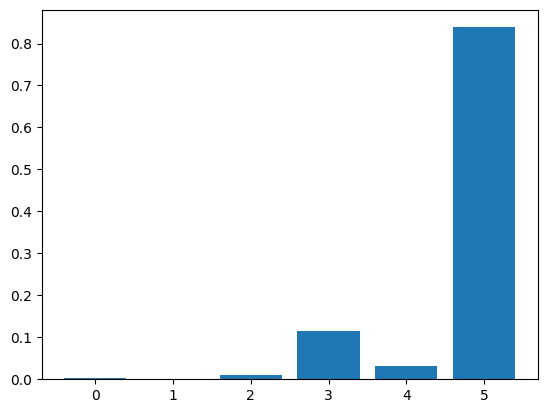

In [ ]:
### YOUR CODE HERE ###
from matplotlib import pyplot
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,Y_train)
importance = dt.feature_importances_
for (f,s) in enumerate (importance):
  print("feature: " + str(f) + "\timportance : " +str(s))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


## Part B3.1 Create the Feature_selector function

Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and:
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbors) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is below **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.


In [ ]:
### YOUR CODE HERE ###

def Feature_selector (X_train_, y_train_, threshold):

  # initalizing some variables
  Fselec_colnames = X_test.columns # stores feature names
  # initialized with full feature CV accuracy and corresponding k value
  best_k = []
  best_mCV = []
  removed_feat = [] #stores removed features

  # adding values for full feature CV accuracy calculated before
  FF_CV = max(cv_val_acc)
  best_k.append(cv_val_acc.index(FF_CV)+1)
  best_mCV.append(FF_CV)
  removed_feat.append('none')

  dt = tree.DecisionTreeClassifier() # initializing decision tree
  dt.fit(X_train_, y_train_)
  importance = dt.feature_importances_ # getting feaure importances

  cv = KFold(n_splits = 5, shuffle = True, random_state = 0) # using same split as before

  # calculating cross validation with feature selection
  while (importance.shape[0] > 1 and min(best_mCV)>= threshold*FF_CV):

    removed_feat.append(Fselec_colnames[np.argmin(importance)])
    Fselec_colnames = np.delete(Fselec_colnames, np.argmin(importance))
    X_train_ = np.delete(X_train_,np.argmin(importance),
                                  axis = 1)
    importance = np.delete(importance,np.argmin(importance))

    cv_val_acc_selec = []

       # using k = 1 to 100
    for i in range (1,101):
      knn = KNeighborsClassifier(n_neighbors=i)
      # fit the model and get results
      cv_results = cross_validate(knn,
                             X_train_,
                                y_train_, cv = cv) #5 fold cv
      cv_val_acc_selec.append(np.mean(cv_results['test_score']))


    best_k.append(cv_val_acc_selec.index(max(cv_val_acc_selec)) + 1)
    best_mCV.append(max(cv_val_acc_selec))

    dt.fit(X_train_,y_train_) # refitting model
    importance = dt.feature_importances_

  return removed_feat, best_mCV, best_k


## Part B3.2 Implement the Feature_selector function **[20 Marks]**


Call your Feature_selector function on the standardized training data with a threshold of 95%.


* Visualize your results by plotting the mean cross-validation accuracy (y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbors with respect to the number of features.  **[5]**

* State what is the number of essential features for classification, and justify your answer.  **[5]**

* State and record the best accuracy  **[5]**

In [ ]:
### YOUR CODE HERE ###

removed_feat,mCV_Fselec,k_Fselec = Feature_selector(X_train_norm,Y_train,0.95)

Text(0.5, 1.0, ' CV accuracy for different cardinalities of feature sets')

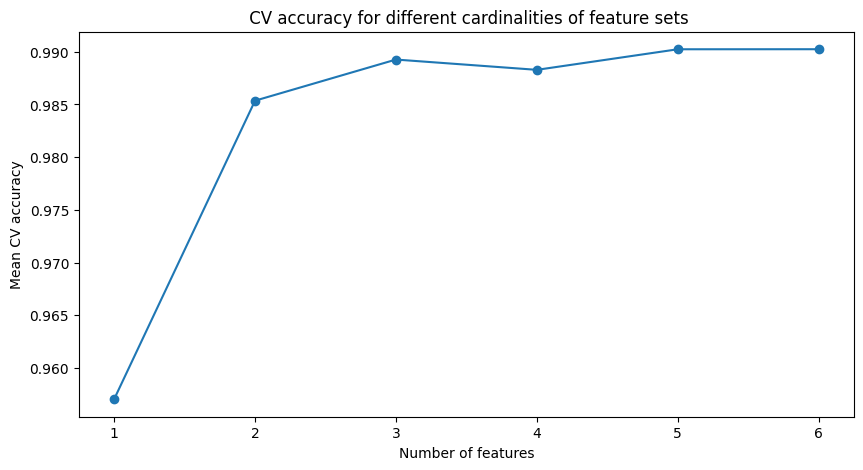

In [ ]:
mCV_Fselec.reverse()

# plotting mCV by # features
plt.figure(figsize=(10,5))
plt.plot(range(1,7), mCV_Fselec, marker = 'o')
plt.xlabel('Number of features')
plt.ylabel('Mean CV accuracy')
plt.title(" CV accuracy for different cardinalities of feature sets")

Text(0.5, 1.0, ' Optimal K for different cardinalities of feature sets')

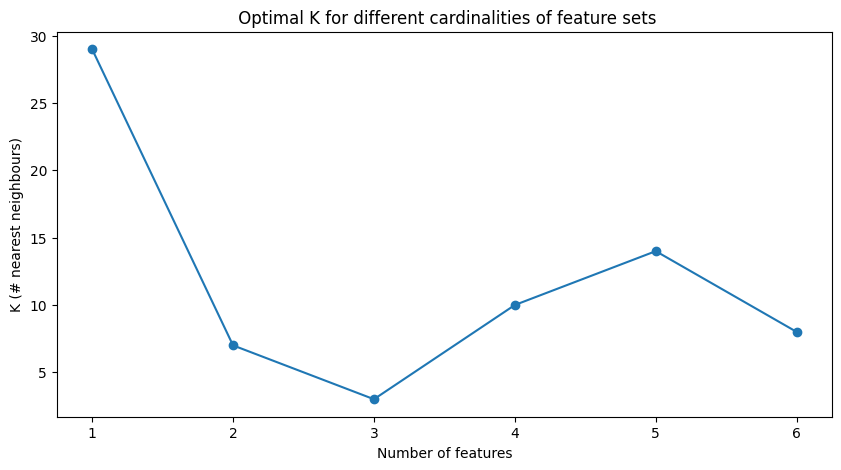

In [ ]:
k_Fselec.reverse()

# plotting k by # features
plt.figure(figsize=(10,5))
plt.plot(range(1,7), k_Fselec, marker = 'o')
plt.xlabel('Number of features')
plt.ylabel('K (# nearest neighbours)')
plt.title(" Optimal K for different cardinalities of feature sets")

In [ ]:
num_feat = mCV_Fselec.index(max(mCV_Fselec)) + 1
print("The number of essential features for classification: " + str(num_feat))
print("Since a feature set of "+ str(num_feat) + " features gives the highest Cross Validation accuracy, the number of essential features is " + str(num_feat))

The number of essential features for classification: 6
Since a feature set of 6 features gives the highest Cross Validation accuracy, the number of essential features is 6


In [ ]:
print("The best accuracy is: " + str(max(mCV_Fselec)))

The best accuracy is: 0.9902391200382592


# Part C: Other Built-in Models & Hyperparameter Tuning **[30 Marks Total]**

In this part, you will use some built-in models, and **tune their hyperparameters** to achieve high accuracy/scores.

Here we want you to **pass in the full feature**, so no need to use the Feature_selector function anymore.

The models you will be using are:

1. Decision Tree (Part C1.1)
2. Random Forest (Part C1.2)
3. Bagged Trees (Part C1.3)
4. Gradient Boosted Trees (Part C1.4)
5. SVM with Polynomial Kernel (Part C2.1)
6. SVM with RBF Kernel (Part C2.2)



## Pact C-1: Tree-based Models **[20 Marks Total]**

## Part C1.1: Decision Tree Classifier **[5 Marks]**

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the hyperparameters `max_depth` and `min_samples_split` using [RandomizedSearchCV ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with n_iter=500, you should set the ranges of the hyperparameters as the following:

* `'max_depth': randint(1, 10)`
* `'min_samples_split': randint(2, 50)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,
* `return_train_score=True`

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best performance using decision tree is 0.987654321 with a max depth of 8 and a min samples split of 25*


In [ ]:
### YOUR CODE HERE ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# initializing a dt
dt = DecisionTreeClassifier()

# performing RandomizedSearchCV

# initializing distributions
distributions = {'max_depth': randint(1, 10), 'min_samples_split': randint(2, 50)}

rs_dt = RandomizedSearchCV(dt, distributions, n_iter = 500,cv =5, verbose = 2, random_state = 42, n_jobs = -1, return_train_score = True)
fit_dt = rs_dt.fit(X_train_norm, Y_train)
best_param = fit_dt.best_params_
best_score_dt = fit_dt.best_score_

print("Best performance using decision tree is " + str(best_score_dt)+ " with a max depth of " + str(best_param['max_depth']) + " and a min samples split of " + str(best_param['min_samples_split']))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best performance using decision tree is 0.9824342419894787 with a max depth of 9 and a min samples split of 3


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Part C1.2: Random Forests **[5 Marks]**

Train a Random Forest classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and check the example there.) Tune the `n_estimators` and `max_features` parameters of the classifier using [RandomizedSearchCV ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with n_iter=500, you should set the ranges of the hyperparameters you want to tune, set:

* `max_features : ['sqrt', 'log2', 0.1, 0.25, 0.5]`,
* `n_estimators : randint(10, 200)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best n_estimators: 60, Best Max Features: log2, Best Accuracy: 0.987654321*


In [ ]:
### YOUR CODE HERE ###

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# initializing a dt
rf = RandomForestClassifier()

# performing RandomizedSearchCV

# initializing distributions
distributions = {'max_features' : ['sqrt', 'log2', 0.1, 0.25, 0.5], 'n_estimators' : randint(10, 200)}

rs = RandomizedSearchCV(rf, distributions, n_iter = 500,cv =5, verbose = 2, random_state = 42, n_jobs = -1)
fit_rs = rs.fit(X_train_norm, Y_train)
best_param = fit_rs.best_params_
best_score_rf = fit_rs.best_score_

print("Best n_estimators: " + str(best_param['n_estimators'])+ ",Best Max Features: " + str(best_param['max_features']) + ",Best Accuracy: " + str(best_score_rf))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best n_estimators: 44,Best Max Features: 0.1,Best Accuracy: 0.9931659493065519


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Part C1.3: Bagging (ensemble of bagged trees) **[5 Marks]**

Similarly, train a bagging classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and check the example there.) Here we can set the max_features to the number of features in our dataset.


Then tune the `n_estimators` parameter of the classifier using cross-validation (CV).

Set:

* `n_estimators = [10, 50, 100, 200]`


Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best n_estimators (Bagged Trees): 100, Best Accuracy (Bagged Trees): 0.987654321*


In [ ]:
### YOUR CODE HERE ###

from sklearn.ensemble import BaggingClassifier
from scipy.stats import randint

# setting folds
cv = KFold(n_splits=5,
            shuffle=True, random_state = 10)

# setting list to record accuracies
acc = []

# estimator list
n_estimators = [10, 50, 100, 200]

# initializing a bagging classifier and looping through different n estimator values
for n in n_estimators:
  bg = BaggingClassifier(max_features = X.columns.size, n_estimators = n)
  cv_results = cross_validate(bg,
                             X_train_norm,
                                Y_train, cv = cv) #5 fold cv
  acc.append(np.mean(cv_results['test_score']))

best_score_bg = max(acc)
best_n_estimators = n_estimators[acc.index(best_score_bg)]

print("Best n_estimators(Bagged Trees): " + str(best_n_estimators)+ ", Best Accuracy(Bagged Trees): " + str(best_score_bg))


Best n_estimators(Bagged Trees): 10, Best Accuracy(Bagged Trees): 0.9853419416547107


## Part C1.4: Gradient Boosting Classifier **[5 Marks]**

Similarly, train a Gradient Boosting classifier on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and check the example there.)


Then tune the hyperparameters `n_estimators`, `learning_rate`, and `max_depth` using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

For the ranges of those hyperparameters please do the following:  

*   `learning_rate = uniform(0, 0.15)`
*   `max_depth = [1,2,3] `
*   `n_estimators = randint(10, 200)`


For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *n_estimators: 100, Best Learning Rate: 0.14, Best Max Depth: 2, Best Accuracy: 0.987654321*


In [ ]:
### YOUR CODE HERE ###

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


# initializing a gbc
gbc = GradientBoostingClassifier()

# performing RandomizedSearchCV

# initializing distributions
distributions = {'learning_rate' : uniform(0, 0.15),'max_depth' : [1,2,3],'n_estimators' : randint(10, 200)}

rs = RandomizedSearchCV(gbc, distributions, n_iter = 500,cv =5, verbose = 2, random_state = 42, n_jobs = -1)
fit_gbc = rs.fit(X_train_norm, Y_train)
best_param = fit_gbc.best_params_
best_score_gbc = fit_gbc.best_score_

print("n_estimators: " + str(best_param['n_estimators'])+ ",Best Learning Rate: " + str(best_param['learning_rate'])+ ",Best Max Depth: " + str(best_param['max_depth']) + ",Best Accuracy: " + str(best_score_gbc))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
n_estimators: 113,Best Learning Rate: 0.1363980603118173,Best Max Depth: 2,Best Accuracy: 0.9882926829268293


## Pact C-2: Hyperplane-based Models **[10 Marks Total]**

## Part C2.1: SVM with Polynomial Kernel  **[5 Marks]**

Train an SVM with Polynomial Kernel on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and check the example there.) with `poly` as the kernel setting. Tune the `C` and `degrees` parameters of the classifier using using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

set:
* ` 'C': expon(scale=10)`
* `'degree': randint(2, 6)`
    
For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best C: 2, Best degree: 5, Best Accuracy: 0.98754321*

In [ ]:
### YOUR CODE HERE ###
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, expon


# initializing a svm
svm = SVC(kernel = 'poly')

# performing RandomizedSearchCV

# initializing distributions
distributions = {'C': expon(scale=10),'degree': randint(2, 6)}

rs = RandomizedSearchCV(svm, distributions, n_iter = 500,cv =5, verbose = 2, random_state = 42, n_jobs = -1)
fit_svmp = rs.fit(X_train_norm, Y_train)
best_param = fit_svmp.best_params_
best_score_svmp = fit_svmp.best_score_

print("Best C: " + str(best_param['C'])+ ",Best degree: " + str(best_param['degree'])+ ",Best Accuracy: " + str(best_score_svmp))



Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best C: 3.6352874647320794,Best degree: 3,Best Accuracy: 0.9834050693448111


## Part C2.2: SVM with Radial Kernel **[5 Marks]**

Similarly train an SVM with radial kernel on the standardized full feature dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and check the example there.) with `rbf` as the kernel value. Tune the `C` and `gamma` parameters of the classifier using [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with `n_iter = 500`.

set:

*  `'C': expon(scale=10)`
* `'gamma': ['scale', 'auto', 0.1, 1] `

For RandomizedSearchCV, use:

* `cv=5`,
* `verbose=2`,
* `random_state=42`,
* `n_jobs=-1`,

Record & print out:

* the highest  mean cross-validated accuracy/score, and
* the value of the hyperparameter you tuned, that achieved the highest accuracy/score.
* i.e: *Best C: 2, Best Gamma: scale, Best Accuracy: 0.98754321*


In [ ]:
### YOUR CODE HERE ###
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, expon


# initializing a svm
svm = SVC(kernel = 'rbf')

# performing RandomizedSearchCV

# initializing distributions
distributions = {'C': expon(scale=10),'gamma': ['scale', 'auto', 0.1, 1]}

rs = RandomizedSearchCV(svm, distributions, n_iter = 500,cv =5, verbose = 2, random_state = 42, n_jobs = -1)
fit_svcr = rs.fit(X_train_norm, Y_train)
best_param = fit_svcr.best_params_
best_score_svmr = fit_svcr.best_score_

print("Best C: " + str(best_param['C'])+ ",Best Gamma: " + str(best_param['gamma'])+ ",Best Accuracy: " + str(best_score_svmr))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best C: 2.8673882298329834,Best Gamma: scale,Best Accuracy: 0.9931707317073171


# Part D: Report the accuracy of all your tuned models **[7 Marks]**

Congratulations! So far you have developed 7 models, these models are:

1.   Decision Tree
2.   Random Forest
3.   Bagged Trees
4.   Gradient Boosted Trees
5.   SVM with Polynomial Kernel
6.   SVM with RBF Kernel
7.   The Feature Selection Model you developed in Part B



Either make a table or simply print out the results for all of your models, including the feature-removal with standardization.

(1 mark for each model)


In [ ]:
### YOUR CODE HERE ###
print("Accuracy for Decision Tree: " + str(best_score_dt))
print("Accuracy for Random Forest: " + str(best_score_rf))
print("Accuracy for Bagged Trees: " + str(best_score_bg))
print("Accuracy for Gradient Boosted Trees: " + str(best_score_gbc))
print("Accuracy for SVM with polynomial kernel: " + str(best_score_svmp))
print("Accuracy for SVM with RBF kernel: " + str(best_score_svmr))
print("Accuracy for Feature Selection Model: " + str(max(mCV_Fselec)))


Accuracy for Decision Tree: 0.9824342419894787
Accuracy for Random Forest: 0.9931659493065519
Accuracy for Bagged Trees: 0.9853419416547107
Accuracy for Gradient Boosted Trees: 0.9882926829268293
Accuracy for SVM with polynomial kernel: 0.9834050693448111
Accuracy for SVM with RBF kernel: 0.9931707317073171
Accuracy for Feature Selection Model: 0.9902391200382592


# Part E: Evaluation on Test Data **[10 Marks Total]**


## Part E1: Performance measures **[6 Marks]**

Select your model with the highest accuracy and apply it to the test dataset initially set aside.

Compute the following using the standardized test data (note: never standardize the y data, only standardize the x data):



1.   Accuracy,
2.   Precision,
3.   Recall,
4.   Fall-out rate,
5.   F1 score,
6.   Confusion table

(**1** mark for each performance metric)

In [ ]:
# sklearn metrics code and ROC/AUC referenced from Tutorial 1: "W01_Tut_Performance"

Test accuracy:  0.9931662870159453
Precision:  0.9933110367892977
Recall:  0.9966442953020134
Fall-out rate:  0.014184397163120567
F1 score:  0.9949748743718593


Text(0.5, 14.722222222222216, 'Predicted label')

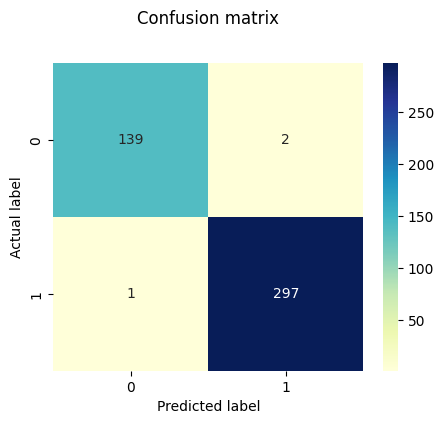

In [ ]:
### YOUR CODE HERE ###
from sklearn import metrics

# getting predictions from test set
pred = fit_svcr.predict(X_test_norm)

#computing confusion matrix
confusion = metrics.confusion_matrix(Y_test, pred)

# getting metrics
print('Test accuracy: ',metrics.accuracy_score(Y_test, pred))
print('Precision: ',metrics.precision_score(Y_test, pred))
print('Recall: ',metrics.recall_score(Y_test, pred))
print('Fall-out rate: ', confusion[0][1] / (confusion[0][1] + confusion[0][0]) )
print('F1 score: ',metrics.f1_score(Y_test, pred))

plt.figure(figsize=(5,4))
p = sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Part E2: ROC and AUC **[4 Marks]**

Using the same selected model from the previous part, plot the ROC curve **[2]** and reporting its AUC **[2]** on the test data.


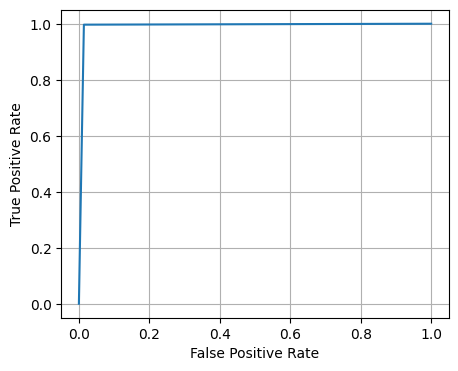

In [ ]:
### YOUR CODE HERE ###
# plotting ROC

fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)


In [ ]:
print('AUC: ', metrics.roc_auc_score(Y_test, pred))

AUC:  0.9912299490694464
